# Задача 2.3

Используя метод Ньютона найти все корни алгебраического уравнения  $P_m(x) = 0$ с точностью $\varepsilon = 10^{-8}$.

$P_m(x) = x^5 - 5.1 x^4 + 9.6 x^3 + 9.8 x^2 - 8.8x - 5$


In [1]:
import numpy as np
from numpy import abs, sqrt, sin, cos, pi, log
from matplotlib import pyplot as plt 

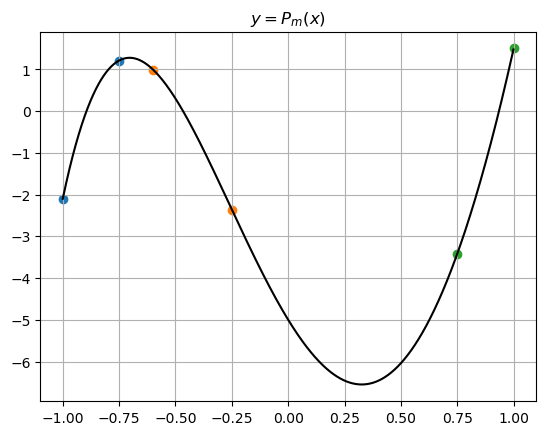

In [102]:
f = lambda x: x ** 5 - 5.1 * x ** 4 + 9.6 * x ** 3 + 9.8 * x ** 2 - 8.8 * x - 5
df = lambda x: 5 * x ** 4 - 20.4 * x ** 3 + 28.8 * x ** 2 + 19.6 * x - 8.8
x = np.arange(-1, 1, 0.001)
loc = np.array([[-1, -0.75], [-0.6, -0.25], [0.75, 1]])
plt.plot(x, f(x), 'k')
[plt.scatter(seg, f(seg)) for seg in loc]
plt.grid()
plt.title('$y = P_m(x)$')
plt.savefig('report/231.eps')
plt.savefig('report/231.png')

Text(0.5, 1.0, "$y = P'_m(x)$")

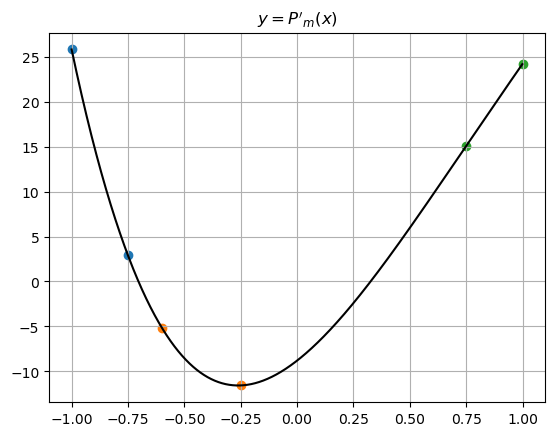

In [3]:
plt.plot(x, df(x), 'k')
[plt.scatter(seg, df(seg)) for seg in loc]
plt.grid()
plt.title("$y = P'_m(x)$")

Поиск корней методом Ньютона.
	Выполнено 4 итераций. x = -0.89479384
	Выполнено 4 итераций. x = -0.46653499
	Выполнено 4 итераций. x = 0.93485047


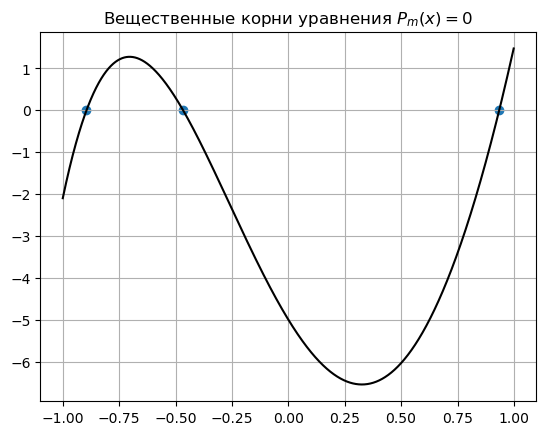

In [104]:
def newton(x0, func, dfunc, eps):
    x1 = x0 - func(x0) / dfunc(x0)
    it = 1
    while abs(x1 - x0) > eps:
        x0 = x1
        x1 = x0 - func(x0) / dfunc(x0)
        it += 1
    print(f"\tВыполнено {it} итераций. x = {np.round(x1, 8)}")
    return x1

eps = 10**(-8)
x0 = (loc[:, 1] + loc[:, 0])/2
print('Поиск корней методом Ньютона.')
roots = np.array([newton(start, f, df, eps) for start in x0])
plt.scatter(roots, f(roots))
plt.plot(x, f(x), "k")
plt.title("Вещественные корни уравнения $P_m(x) = 0$")
plt.grid()

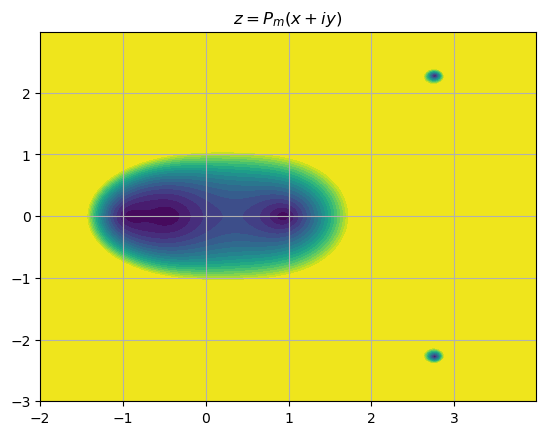

In [106]:
a = 3
c = 1
b = 3
X, Y = np.meshgrid(np.arange(-a+c, a+c, 0.01), np.arange(-b,  b, 0.01))
Z = np.abs(f(X + Y*1j))
Z = np.clip(Z, -30, 30)
levels = np.linspace(Z.min(), Z.max(), 20)
plt.contourf(X, Y, Z, levels=levels)
plt.title('$z = P_m(x + iy)$')
plt.grid()
plt.savefig('report/232.eps')
plt.savefig('report/232.png')

In [92]:
newton(2.8-2.5j, f, df, eps)

	Выполнено 5 итераций. x = (2.7632391762709414-2.2752184295556854j)


(2.7632391762709414-2.2752184295556854j)

In [108]:
newton(2.8+2.5j, f, df, eps)

	Выполнено 5 итераций. x = (2.76323918+2.27521843j)


(2.7632391762709414+2.2752184295556854j)